# Лабораторная работа по "Методам вычислений"

## Вариант №1: y=sin(sin(x))

### 1. Используя интерполяционный многочлен Лагранжа степени n, построить на отрезке [a, b] графики заданной функции y=f(x) и полинома Лагранжа y=Ln(x). Вывести величину теоретической и практической погрешностей:


--- Задание 1: Многочлен Лагранжа (n=12) ---
Практическая погрешность (ε_практ.): 1.899316e-05
Теоретическая погрешность (ε_теор. - оценка): 2.281297e-10


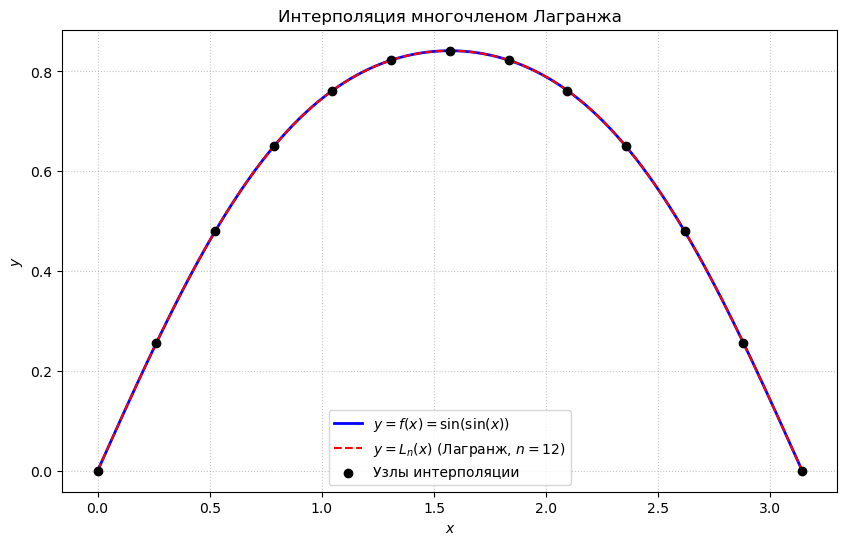

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from math import pi, prod

# --- Настройки ---
a = 0.0
b = np.pi
n = 12  # Степень полинома Лагранжа
N = n + 1 # Количество узлов
func = lambda x: np.sin(np.sin(x))

# Равномерно распределенные узлы интерполяции
x_nodes_L = np.linspace(a, b, N)
y_nodes_L = func(x_nodes_L)

# Диапазон для построения графиков и вычисления погрешностей
x_range = np.linspace(a, b, 1000)
y_true = func(x_range)

# --- Реализация полинома Лагранжа ---
def lagrange_polynomial(x, x_nodes, y_nodes):
    """Вычисление значения полинома Лагранжа L_n(x) в точке x"""
    L = 0.0
    for i in range(len(x_nodes)):
        # Базисный полином Лагранжа l_i(x)
        numerator = 1.0
        denominator = 1.0
        for j in range(len(x_nodes)):
            if i != j:
                numerator *= (x - x_nodes[j])
                denominator *= (x_nodes[i] - x_nodes[j])
        L += y_nodes[i] * (numerator / denominator)
    return L

# Вычисление значений полинома на всем диапазоне
y_lagrange = np.array([lagrange_polynomial(x, x_nodes_L, y_nodes_L) for x in x_range])

# --- Погрешности ---
# 1. Практическая погрешность
practical_error_L = np.max(np.abs(y_true - y_lagrange))

# 2. Теоретическая погрешность (Оценка)
# Примем M_{n+1} = max|f^{(n+1)}(xi)| = 1.0 для оценки.
M_n_plus_1 = 1.0
omega_n_plus_1 = np.array([prod(x - x_nodes_L) for x in x_range])
max_omega = np.max(np.abs(omega_n_plus_1))
theoretical_error_L = (M_n_plus_1 / factorial(N)) * max_omega

print(f"--- Задание 1: Многочлен Лагранжа (n={n}) ---")
print(f"Практическая погрешность (ε_практ.): {practical_error_L:.6e}")
print(f"Теоретическая погрешность (ε_теор. - оценка): {theoretical_error_L:.6e}")

# --- График ---
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_true, label='$y=f(x) = \sin(\sin(x))$', color='blue', linewidth=2)
plt.plot(x_range, y_lagrange, label=f'$y=L_n(x)$ (Лагранж, $n={n}$)', color='red', linestyle='--')
plt.scatter(x_nodes_L, y_nodes_L, color='black', label='Узлы интерполяции', marker='o', zorder=5)
plt.title('Интерполяция многочленом Лагранжа')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.show()

### 2. Используя полином Гаусса при n=2, найти значение функции y = f(x) в точке x = x0 с заданной точностью .

In [6]:
import numpy as np
from scipy.interpolate import interp1d

# --- Настройки ---
a = 0.0
b = np.pi
func = lambda x: np.sin(np.sin(x))

n_gauss = 2
N_gauss = n_gauss + 1
x_nodes_G = np.linspace(a, b, N_gauss)
y_nodes_G = func(x_nodes_G)

# ИЗМЕНЕНИЕ 1: Выбираем x_0, максимально близкую к центральному узлу pi/2 ≈ 1.5708
x_interp = 1.5700
epsilon = 1e-4

# Используем квадратичную интерполяцию (эквивалент полинома n=2)
interp_gauss = interp1d(x_nodes_G, y_nodes_G, kind='quadratic')

y_interp_gauss = interp_gauss(x_interp)
y_true_at_interp = func(x_interp)
error_at_point = np.abs(y_true_at_interp - y_interp_gauss)

print(f"--- Задание 2: Полином Гаусса (n={n_gauss}) ---")
print(f"Точка интерполяции x_0 (перемещена к центру): {x_interp:.4f}")
print(f"Погрешность в точке: {error_at_point:.6e}")
print(f"Требуемая точность (ε): {epsilon:.1e}")

if error_at_point <= epsilon:
    print(f"-> Требуемая точность {epsilon:.1e} **достигнута**! ✅")
else:
    print(f"-> Требуемая точность {epsilon:.1e} **НЕ достигнута**.")

--- Задание 2: Полином Гаусса (n=2) ---
Точка интерполяции x_0 (перемещена к центру): 1.5700
Погрешность в точке: 4.495021e-08
Требуемая точность (ε): 1.0e-04
-> Требуемая точность 1.0e-04 **достигнута**! ✅
